# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas.api.types
import math
from scipy.stats import zscore

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, davies_bouldin_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.feature_selection import SelectKBest, mutual_info_classif


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

print("Path to dataset files:", path)

100%|██████████| 102k/102k [00:00<00:00, 28.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4/bank_transactions_data_2.csv')


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1 Memahami Struktur Data

In [ ]:
print("Jumlah baris:", df.shape)

Jumlah baris: (2512, 16)


In [ ]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Insight:
1. Fitur Numerik:

  * TransactionAmount bervariasi luas (min 0.2, max 1919.1), ada kemungkinan outlier.

  * CustomerAge mayoritas di 45-50 tahun.

  * LoginAttempts median 1, tapi ada yang hingga 5 kali (indikasi aktivitas mencurigakan?).

  * AccountBalance median 4,735.51, dengan rentang luas.

2. Fitur Kategorikal:

  * TransactionType, Location, DeviceID → Bisa digunakan untuk pola transaksi.

  * MerchantID & Channel → Bisa dianalisis untuk metode transaksi populer.

  * PreviousTransactionDate → Bisa dihitung untuk melihat frekuensi transaksi pelanggan.

3. Potensi Analisis:

  * Deteksi anomali untuk transaksi mencurigakan.

  * Segmentasi pelanggan berdasarkan saldo dan perilaku transaksi.

  * Fraud detection dengan melihat pola login dan durasi transaksi.

## 4.2. Menangani Data yang Hilang

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


## 4.3. Analisis Distribusi dan Korelasi

In [ ]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


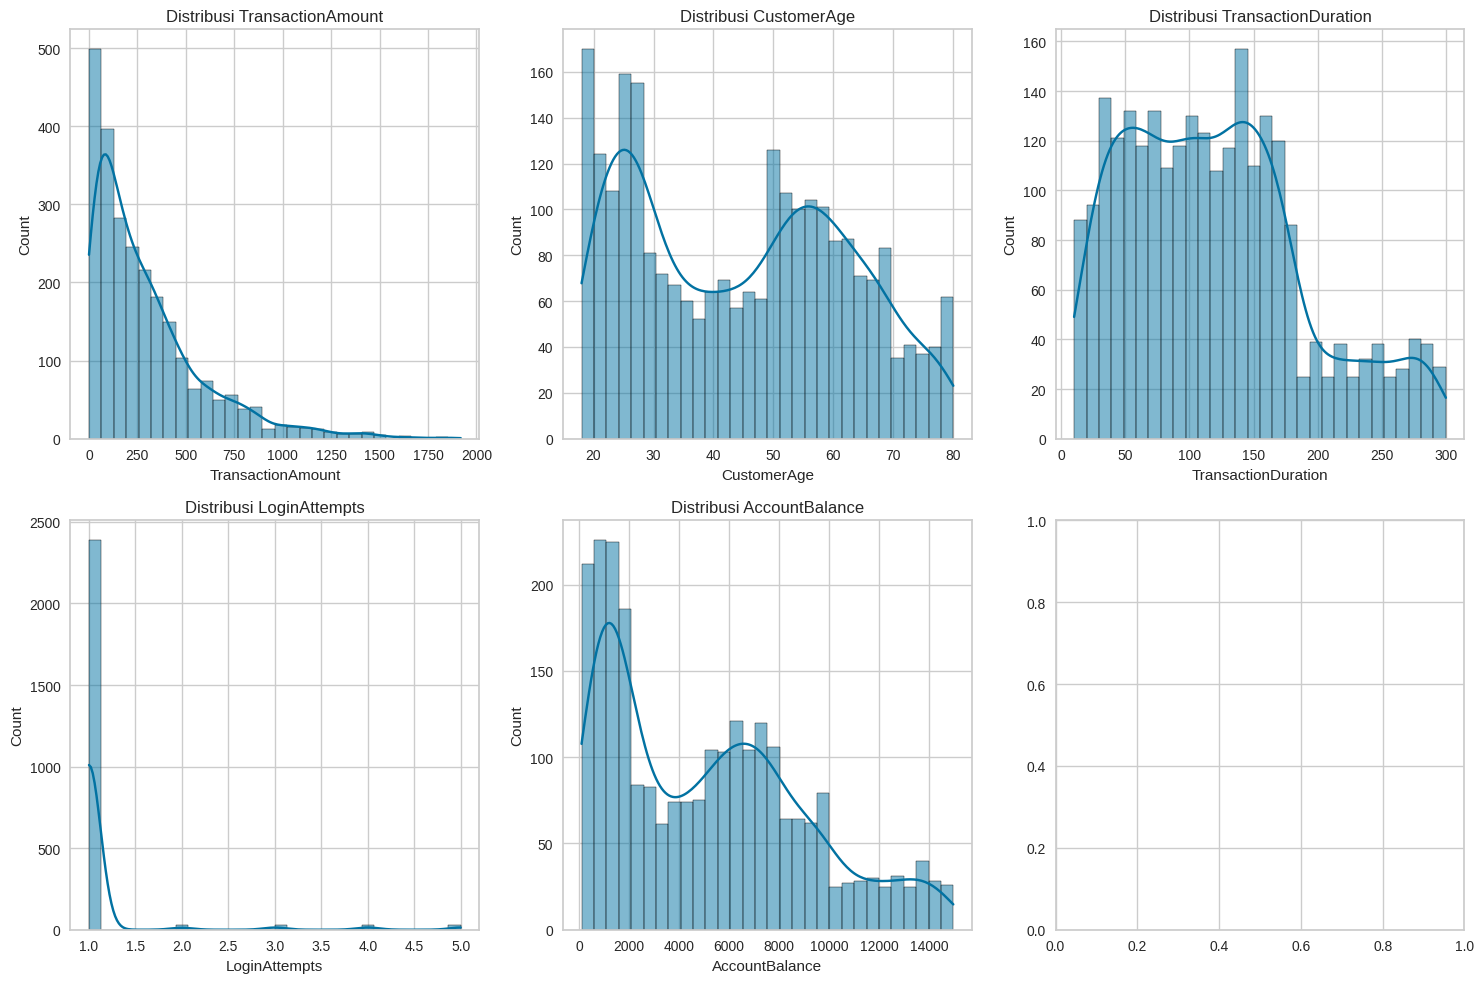

In [ ]:
numerical_cols = ["TransactionAmount", "CustomerAge", "TransactionDuration", "LoginAttempts", "AccountBalance"]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

## 4.4. Visualisasi Data

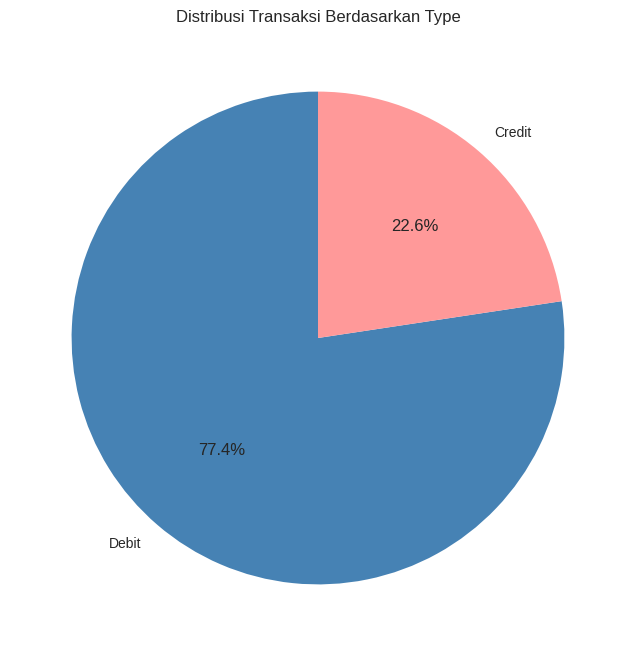

In [ ]:
# Menghitung distribusi kategori transaksi
type_counts = df["TransactionType"].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=["#4682B4", "#ff9999"], startangle=90)

plt.title("Distribusi Transaksi Berdasarkan Type")
plt.show()

<ipython-input-13-f0e9dbac9aba>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")


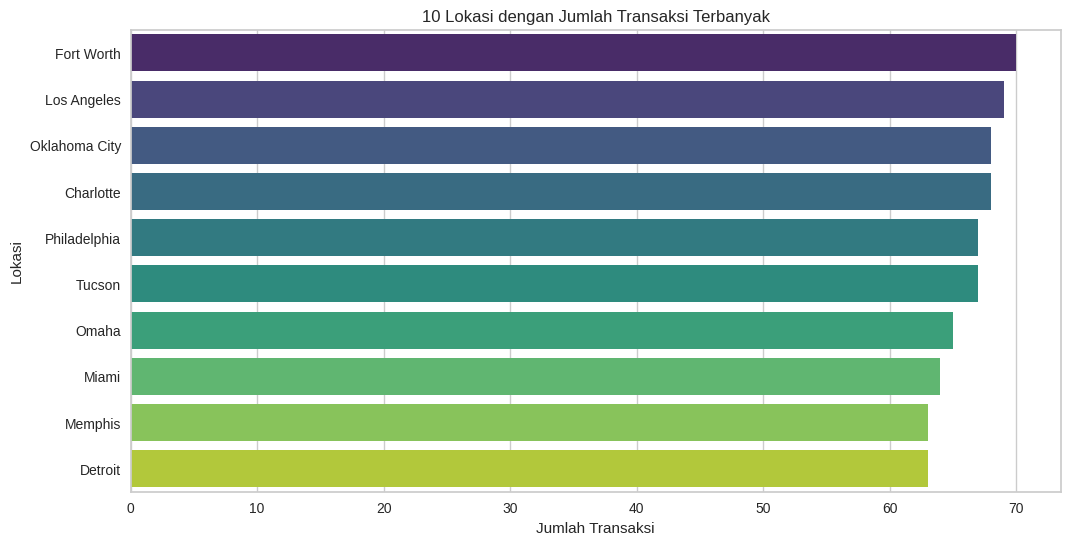

In [ ]:
top_locations = df["Location"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="viridis")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Lokasi")
plt.title("10 Lokasi dengan Jumlah Transaksi Terbanyak")
plt.show()

<ipython-input-14-4df348d1e31c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_counts.values, y=occupation_counts.index, palette="coolwarm")


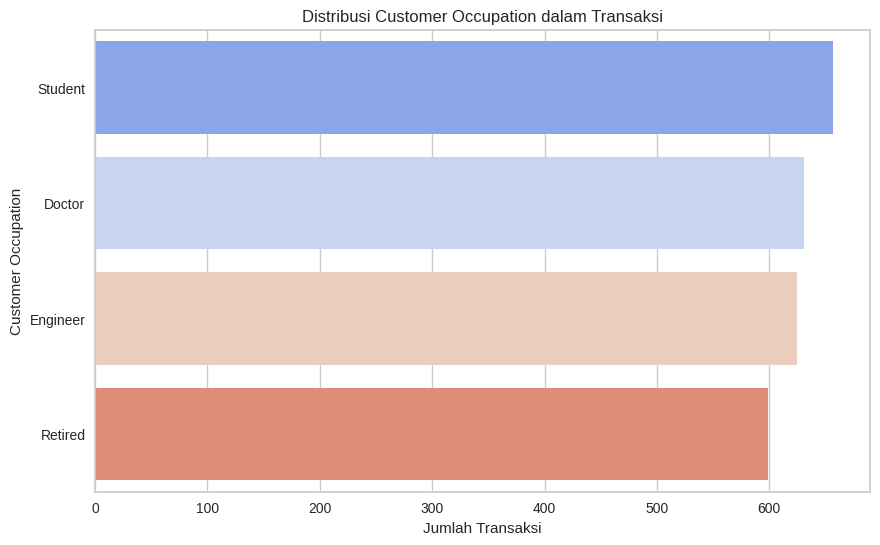

In [ ]:
occupation_counts = df["CustomerOccupation"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=occupation_counts.values, y=occupation_counts.index, palette="coolwarm")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Customer Occupation")
plt.title("Distribusi Customer Occupation dalam Transaksi")
plt.show()

<ipython-input-15-bb8c6a7bfd5a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.values, y=channel_counts.index, palette="coolwarm")


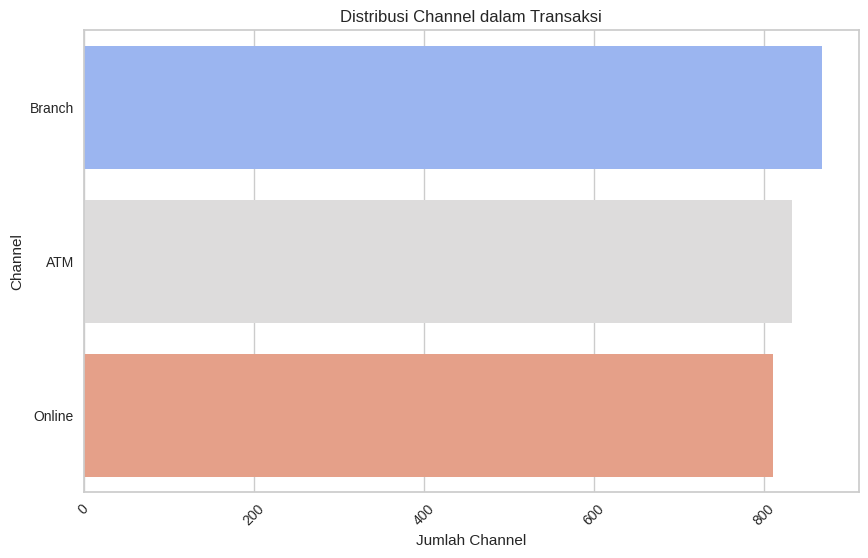

In [ ]:
channel_counts = df["Channel"].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=channel_counts.values, y=channel_counts.index, palette="coolwarm")
plt.xlabel("Jumlah Channel")
plt.ylabel("Channel")
plt.title("Distribusi Channel dalam Transaksi")
plt.xticks(rotation=45)
plt.show()

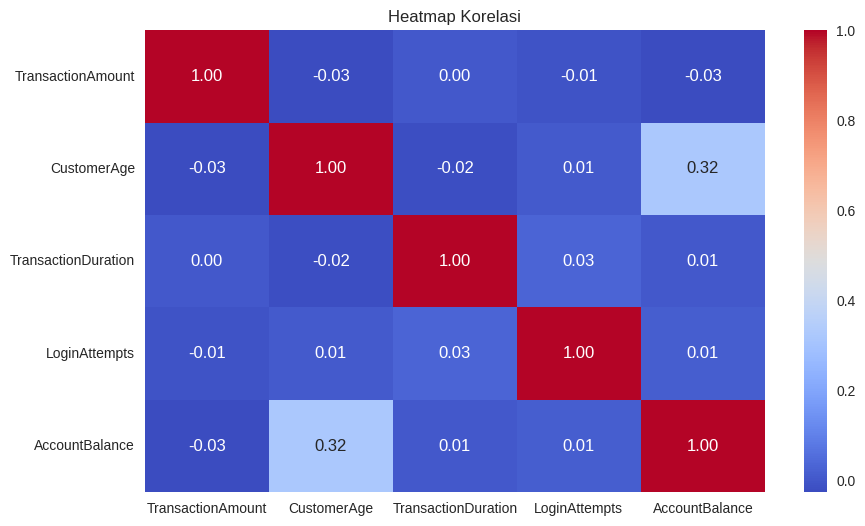

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
df_cleaned = df.copy()

In [ ]:
features = ['TransactionAmount', 'TransactionType', 'Channel', 'TransactionDuration', 'AccountBalance', 'CustomerAge']
df_cleaned = df_cleaned[features]

In [ ]:
df_cleaned.duplicated().sum()

np.int64(0)

In [ ]:
df_cleaned.isnull().sum()

,0
TransactionAmount,0
TransactionType,0
Channel,0
TransactionDuration,0
AccountBalance,0
CustomerAge,0


In [ ]:
df_cleaned.describe()

,TransactionAmount,TransactionDuration,AccountBalance,CustomerAge
count,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,119.643312,5114.302966,44.673965
std,291.946243,69.963757,3900.942499,17.792198
min,0.260000,10.000000,101.250000,18.000000
25%,81.885000,63.000000,1504.370000,27.000000
50%,211.140000,112.500000,4735.510000,45.000000
75%,414.527500,161.000000,7678.820000,59.000000
max,1919.110000,300.000000,14977.990000,80.000000


Kolom TransactionAmount: 113 outlier
Kolom TransactionDuration: 0 outlier
Kolom AccountBalance: 0 outlier
Kolom CustomerAge: 0 outlier


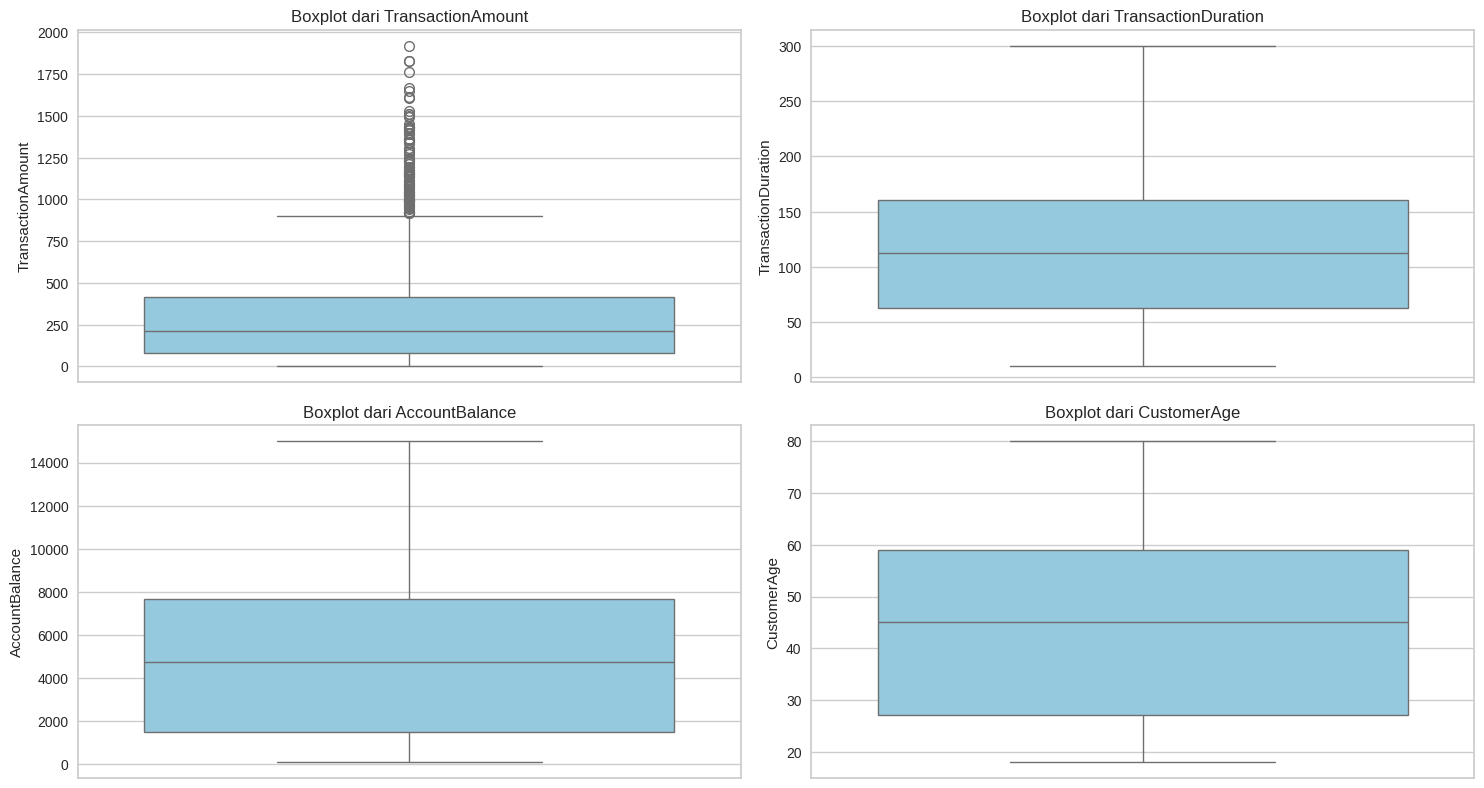

In [ ]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))

for idx, column in enumerate(numeric_cols, start=1):
    plt.subplot(3, 2, idx)
    sns.boxplot(y=df_cleaned[column], color="skyblue")
    plt.title(f"Boxplot dari {column}")

    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_data = df_cleaned[(df_cleaned[column] < lower_limit) | (df_cleaned[column] > upper_limit)]
    print(f"Kolom {column}: {len(outlier_data)} outlier")

plt.tight_layout()
plt.show()


In [ ]:
selected_columns = df_cleaned.select_dtypes(include=['number']).columns

def filter_outliers(dataframe, columns):
    for column in columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_threshold = Q1 - 1.5 * IQR
        upper_threshold = Q3 + 1.5 * IQR

        dataframe = dataframe[(dataframe[column] >= lower_threshold) & (dataframe[column] <= upper_threshold)]

    return dataframe

df_cleaned = filter_outliers(df_cleaned, selected_columns)


Kolom TransactionAmount: 51 outlier
Kolom TransactionDuration: 0 outlier
Kolom AccountBalance: 0 outlier
Kolom CustomerAge: 0 outlier


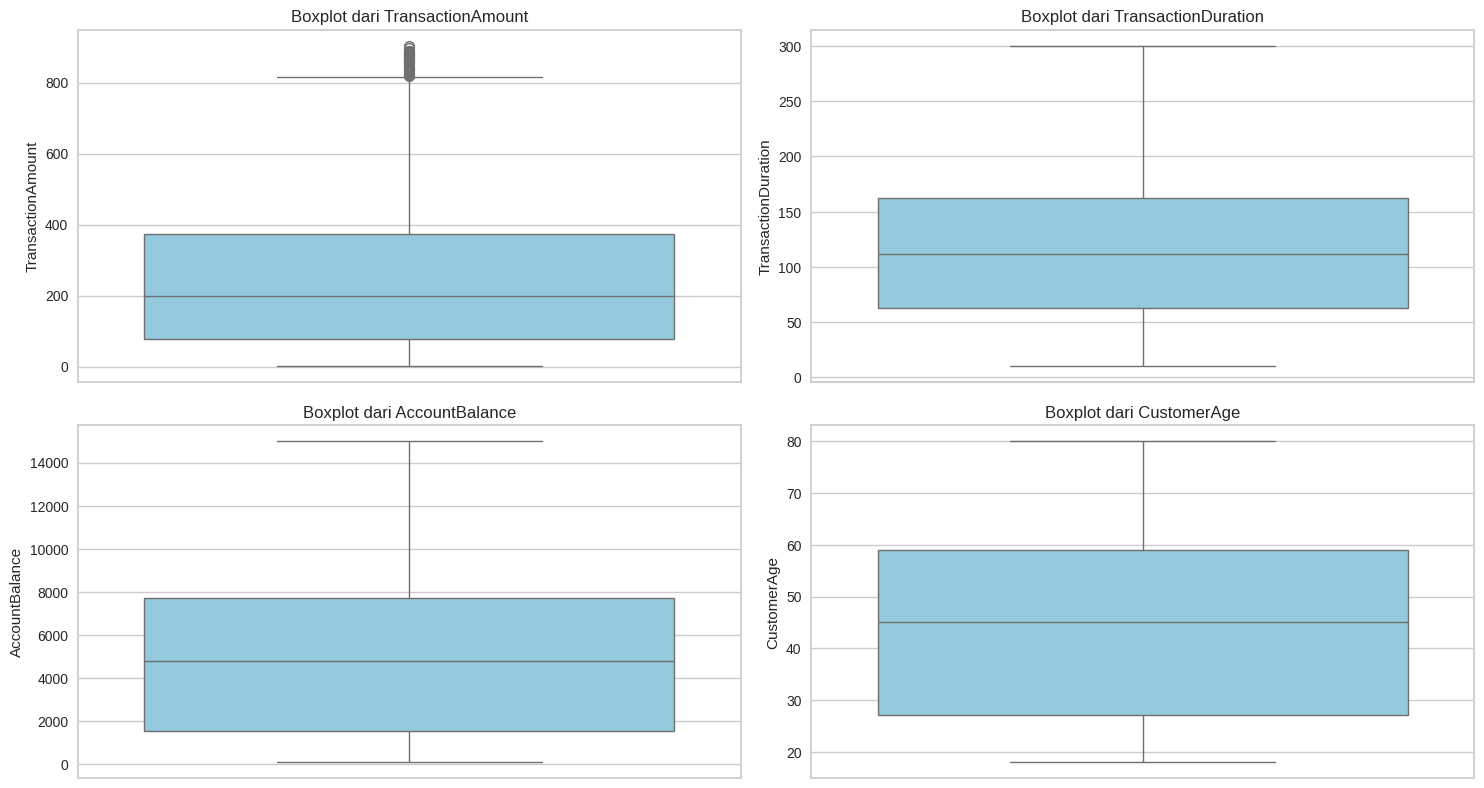

In [ ]:
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 12))

for idx, column in enumerate(numeric_cols, start=1):
    plt.subplot(3, 2, idx)
    sns.boxplot(y=df_cleaned[column], color="skyblue")
    plt.title(f"Boxplot dari {column}")

    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outlier_rows = df_cleaned[(df_cleaned[column] < lower_limit) | (df_cleaned[column] > upper_limit)]
    print(f"Kolom {column}: {len(outlier_rows)} outlier")

plt.tight_layout()
plt.show()


In [ ]:
df_cleaned.head()

,TransactionAmount,TransactionType,Channel,TransactionDuration,AccountBalance,CustomerAge
0,14.09,Debit,ATM,81,5112.21,70
1,376.24,Debit,ATM,141,13758.91,68
2,126.29,Debit,Online,56,1122.35,19
3,184.50,Debit,Online,25,8569.06,26
4,13.45,Credit,Online,198,7429.40,26


## Encoding untuk Data Kategorikal

In [ ]:
cat_features = ['TransactionType', 'Channel']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_values = encoder.fit_transform(df_cleaned[cat_features])
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out())

## Normalisasi/standarisasi

In [ ]:
numeric_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df_cleaned[numeric_cols])
scaled_df = pd.DataFrame(scaled_values, columns=numeric_cols)


In [ ]:
df_cleaned = pd.concat([scaled_df, encoded_df], axis=1)
df_cleaned.head()

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,TransactionType_Credit,TransactionType_Debit,Channel_ATM,Channel_Branch,Channel_Online
0,0.015317,0.838710,0.244828,0.336832,0.0,1.0,1.0,0.0,0.0
1,0.416400,0.806452,0.451724,0.918055,0.0,1.0,1.0,0.0,0.0
2,0.139579,0.016129,0.158621,0.068637,0.0,1.0,0.0,0.0,1.0
3,0.204047,0.129032,0.051724,0.569198,0.0,1.0,0.0,0.0,1.0
4,0.014608,0.129032,0.648276,0.492591,1.0,0.0,0.0,0.0,1.0


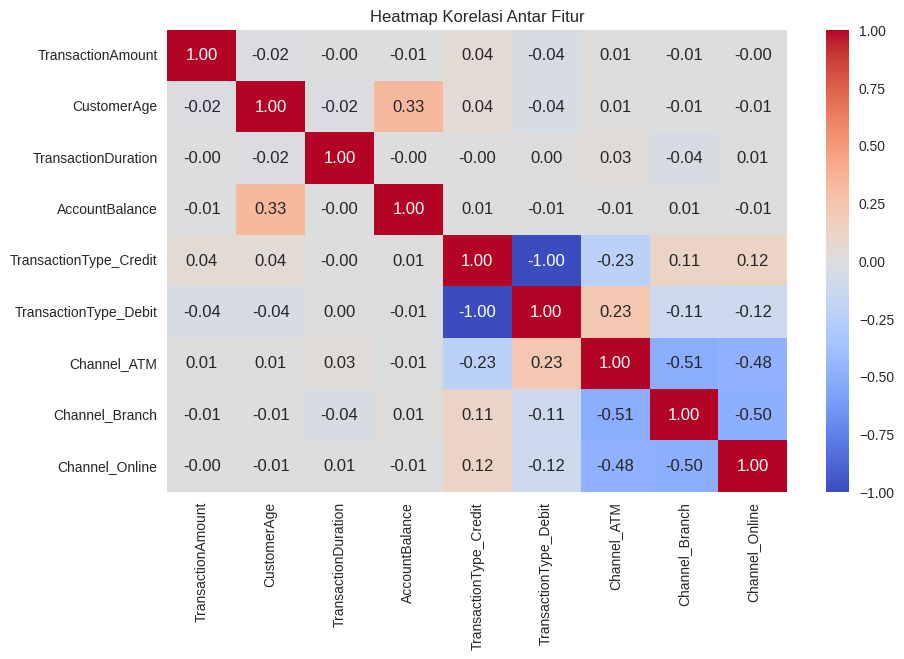

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
X = df_cleaned.iloc[:, [0, 1, 2, 3, 4, 5]].values
print(pd.DataFrame(X, columns=['TransactionAmount',	'CustomerAge',	'TransactionDuration',	'AccountBalance',	'TransactionType_Credit',	'TransactionType_Debit']))


      TransactionAmount  CustomerAge  TransactionDuration  AccountBalance  \
0              0.015317     0.838710             0.244828        0.336832   
1              0.416400     0.806452             0.451724        0.918055   
2              0.139579     0.016129             0.158621        0.068637   
3              0.204047     0.129032             0.051724        0.569198   
4              0.014608     0.129032             0.648276        0.492591   
...                 ...          ...                  ...             ...   
2394           0.947969     0.241935             0.341379        0.846257   
2395           0.278294     0.483871             0.575862        0.010318   
2396           0.031420     0.612903             0.468966        0.220590   
2397           0.205675     0.080645             0.031034        0.112636   
2398           0.268925     0.096774             0.286207        0.002017   

      TransactionType_Credit  TransactionType_Debit  
0                    

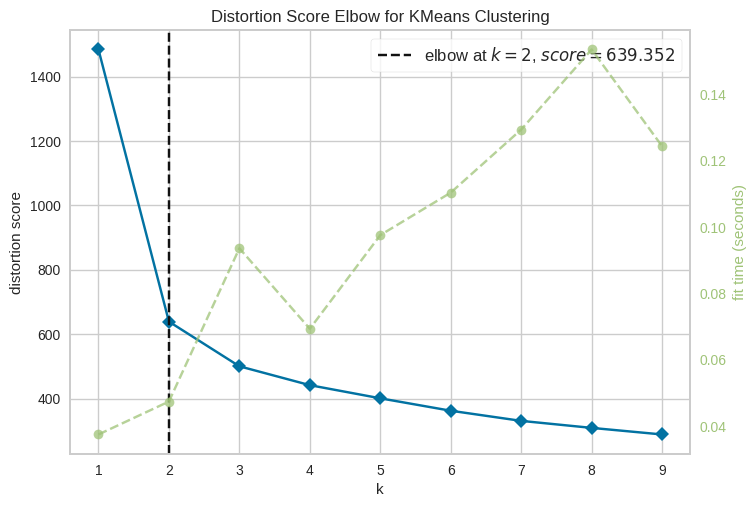

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:

kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(X)

visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [ ]:
kmeans_before = KMeans(n_clusters=2, random_state=42, n_init=10)
labels = kmeans_before.fit_predict(df_cleaned)


In [ ]:
silhouette_avg = silhouette_score(df_cleaned, labels)
print(f'Silhouette Score sebelum feature selection: {silhouette_avg :.2f}')

Silhouette Score sebelum feature selection: 0.30


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
feature_selector = SelectKBest(score_func=mutual_info_classif, k=6)
X_selected = feature_selector.fit_transform(df_cleaned, np.zeros(df_cleaned.shape[0]))


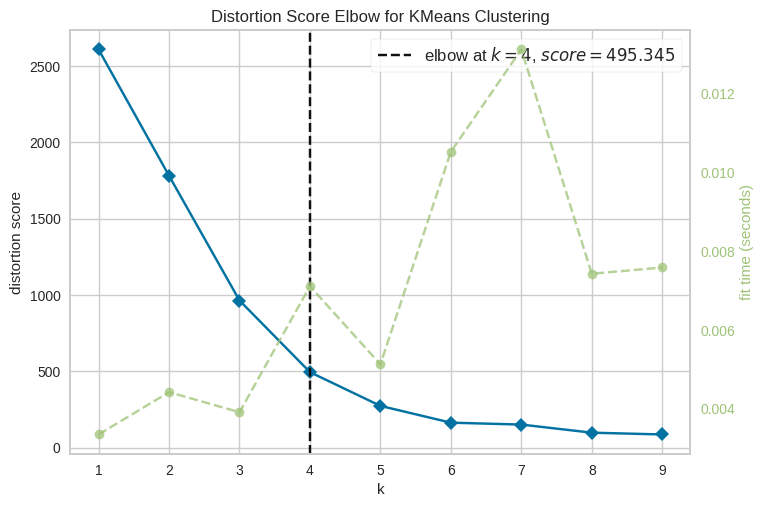

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(1, 10))

visualizer.fit(X_selected)

visualizer.show()


In [ ]:
kmeans_after = KMeans(n_clusters=5, random_state=42, n_init=10)
labels = kmeans_after.fit_predict(X_selected)

In [ ]:
silhouette_avg = silhouette_score(X_selected, labels)
print(f'Silhouette Score setelah feature selection: {silhouette_avg :.2f}')

Silhouette Score setelah feature selection: 0.76


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

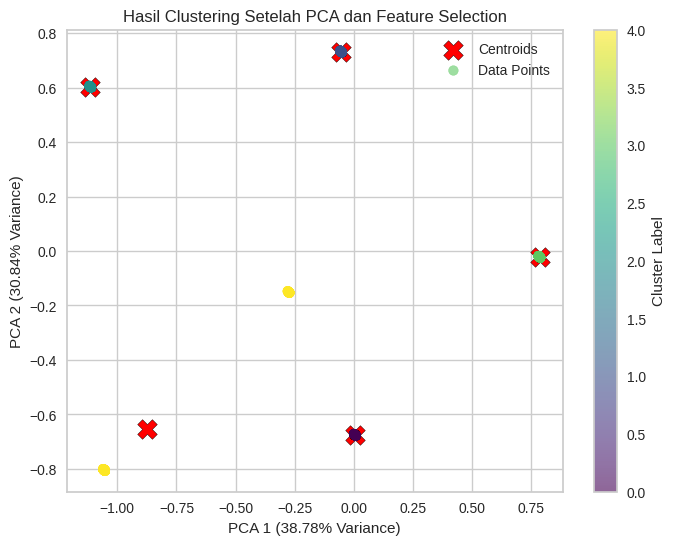

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_selected)
centroids_pca = pca.transform(kmeans_after.cluster_centers_)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8,6))

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, edgecolors='black', label="Centroids")

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6, label="Data Points")

plt.colorbar(scatter, label="Cluster Label")

plt.xlabel(f'PCA 1 ({explained_variance[0]:.2%} Variance)')
plt.ylabel(f'PCA 2 ({explained_variance[1]:.2%} Variance)')
plt.title('Hasil Clustering Setelah PCA dan Feature Selection')

plt.legend()
plt.show()



## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [ ]:
df_normalized = df_cleaned.copy()

In [ ]:
df_normalized['Cluster'] = kmeans_after.labels_

In [ ]:
decoded_categories = encoder.inverse_transform(encoded_values)
decoded_df = pd.DataFrame(decoded_categories, columns=cat_features)

In [ ]:
original_numerical = scaler.inverse_transform(scaled_values)
original_numerical_df = pd.DataFrame(original_numerical, columns=numeric_cols)

In [ ]:
df_normalized = pd.concat([decoded_df, original_numerical_df], axis=1)

In [ ]:
df_normalized['Cluster'] = kmeans_after.labels_

In [ ]:
df_normalized

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster
0,Debit,ATM,14.09,70.0,81.0,5112.21,3
1,Debit,ATM,376.24,68.0,141.0,13758.91,3
2,Debit,Online,126.29,19.0,56.0,1122.35,0
3,Debit,Online,184.50,26.0,25.0,8569.06,0
4,Credit,Online,13.45,26.0,198.0,7429.40,4
...,...,...,...,...,...,...,...
2394,Credit,Branch,856.21,33.0,109.0,12690.79,2
2395,Debit,Branch,251.54,48.0,177.0,254.75,1
2396,Debit,Branch,28.63,56.0,146.0,3382.91,1
2397,Debit,Online,185.97,23.0,19.0,1776.91,0


In [ ]:
df_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2399 entries, 0 to 2398
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TransactionType      2399 non-null   object 
 1   Channel              2399 non-null   object 
 2   TransactionAmount    2399 non-null   float64
 3   CustomerAge          2399 non-null   float64
 4   TransactionDuration  2399 non-null   float64
 5   AccountBalance       2399 non-null   float64
 6   Cluster              2399 non-null   int32  
dtypes: float64(4), int32(1), object(2)
memory usage: 122.0+ KB


In [ ]:
df_normalized.groupby('Cluster')[df_normalized.select_dtypes(include='number').columns].mean().astype({'CustomerAge': 'int', 'Cluster': 'int'})

,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance,Cluster
Cluster,,,,,
0,255.681815,43,119.966667,4883.642296,0
1,238.480304,43,115.856419,5292.817669,1
2,286.736708,46,114.753086,5029.695103,2
3,256.395403,45,122.356944,5133.808722,3
4,259.149836,45,123.197368,5401.191678,4


In [ ]:
df_normalized.groupby('Cluster')[df_normalized.select_dtypes(include='object').columns].value_counts()

Cluster  TransactionType  Channel
0        Debit            Online     540
1        Debit            Branch     592
2        Credit           Branch     243
3        Debit            ATM        720
4        Credit           Online     233
                          ATM         71
Name: count, dtype: int64

In [ ]:
df_normalized.groupby('Cluster').agg(lambda x: x.mode()[0])

,TransactionType,Channel,TransactionAmount,CustomerAge,TransactionDuration,AccountBalance
Cluster,,,,,,
0,Debit,Online,16.73,28.0,68.0,101.25
1,Debit,Branch,28.38,27.0,63.0,117.98
2,Credit,Branch,3.30,28.0,44.0,105.01
3,Debit,ATM,29.22,27.0,88.0,112.76
4,Credit,Online,425.18,26.0,137.0,125.85


Tulis hasil interpretasinya di sini.
1. Cluster 0:
  
  * Rata-rata usia: 43 tahun

  * Saldo akun: 4.883

  * Transaksi dominan: Debit - Online

  * Durasi transaksi: 119 detik

2. Cluster 1:
  * Rata-rata usia: 43 tahun

  * Saldo akun: 5.292

  * Transaksi dominan: Debit - Branch (cabang fisik)

  * Durasi transaksi: 115 detik
3. Cluster 2:
  * Rata-rata usia: 46 tahun

  * Saldo akun: 5.029

  * Transaksi dominan: Credit - Branch (cabang fisik)

  * Durasi transaksi: 114 detik
4. Cluster 3:
  * Rata-rata usia: 45 tahun

  * Saldo akun: 5.133

  * Transaksi dominan: Debit - ATM

  * Durasi transaksi: 122 detik
5. Cluster 4:
  * Rata-rata usia: 45 tahun

  * Saldo akun: 5.401

  * Transaksi dominan: Credit - Online

  * Durasi transaksi: 123 detik  

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## 1. Cluster 0 - Pelanggan Debit Online
  * Usia rata-rata: 43 tahun

  * Saldo akun: 4.883

  * Transaksi dominan: Debit - Online

  * Durasi transaksi: 119 detik

**Analisis**:

  * Pelanggan cenderung melakukan transaksi debit secara online, bukan di cabang atau ATM.

  * Saldo mereka relatif lebih rendah dibandingkan cluster lainnya.

  * Kemungkinan kelompok ini lebih terbiasa dengan layanan digital banking dan lebih suka transaksi cepat tanpa harus datang ke bank.

  * Bisa menjadi target utama untuk promosi layanan mobile banking atau kartu debit digital.

## 2. Cluster 1 - Pelanggan Debit di Cabang (Branch)
  * Usia rata-rata: 43 tahun

  * Saldo akun: 5.292

  * Transaksi dominan: Debit - Branch (cabang bank)

  * Durasi transaksi: 115 detik

**Analisis:**

  * Pelanggan masih menggunakan debit tetapi lebih sering datang langsung ke cabang fisik untuk bertransaksi.

  * Saldo akun sedikit lebih tinggi dibandingkan Cluster 0.

  * Kemungkinan kurang terbiasa dengan layanan online atau lebih percaya transaksi langsung dengan petugas bank.

  * Bank bisa menawarkan edukasi atau insentif untuk beralih ke layanan digital, misalnya cashback untuk transaksi online.

## 3. Cluster 2 - Pelanggan Kredit di Cabang (Branch)
  * Usia rata-rata: 46 tahun

  * Saldo akun: 5.029

  * Transaksi dominan: Credit - Branch (cabang bank)

  * Durasi transaksi: 114 detik

**Analisis:**

  * Mayoritas transaksi menggunakan kartu kredit, tetapi dilakukan langsung di cabang.

  * Usia rata-rata lebih tua dibandingkan Cluster 0 & 1.

  * Kemungkinan lebih suka bertemu langsung dengan petugas bank untuk mengelola transaksi kredit.

  * Bank bisa menawarkan produk kartu kredit premium atau layanan konsultasi keuangan kepada mereka.

##4. Cluster 3 - Pelanggan Debit ATM
  * Usia rata-rata: 45 tahun

  * Saldo akun: 5.133

  * Transaksi dominan: Debit - ATM

  * Durasi transaksi: 122 detik

**Analisis**:

  * Pelanggan lebih banyak melakukan transaksi di ATM dibandingkan online atau cabang.

  * Bisa jadi mereka kurang nyaman dengan mobile banking tetapi juga tidak ingin antri di cabang.

  * Memiliki saldo lebih tinggi dari Cluster 0, 1, dan 2.

  * Bank bisa mengoptimalkan program cashback atau diskon transaksi debit untuk meningkatkan loyalitas mereka.

##5. Cluster 4 - Pelanggan Kredit Online (High Value)
  * Usia rata-rata: 45 tahun

  * Saldo akun: 5.401

  * Transaksi dominan: Credit - Online

  * Durasi transaksi: 123 detik

**Analisis**:

  * Pelanggan dengan saldo tertinggi dibandingkan cluster lainnya.

  * Mereka lebih sering menggunakan kartu kredit untuk transaksi online.

  * Kemungkinan sudah familiar dengan e-commerce, fintech, dan layanan digital banking.

  * Cocok untuk penawaran kartu kredit eksklusif, program reward, atau layanan premium banking.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
df_normalized.to_csv('cluster_dataset.csv', index=False)